# Chapter 2 Laboratory

The official laboratory can be found [here](https://www.openintro.org/book/statlabs/?statlab=intro_to_data). I will replicate that one in my own way, so the answers you will see here are made by me only. We are going to use the local copy of the `cdc.csv`. We start first by importing all the relevant libraries.

In [62]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid")

## Getting started

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data.

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

We begin by loading the data from `cdc.csv` file.

In [63]:
cdc_path = Path("../datasets/cdc.csv")
cdc_df = pd.read_csv(cdc_path)

# Let's see some data
display(cdc_df)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
...,...,...,...,...,...,...,...,...,...
19995,good,1,1,0,66,215,140,23,f
19996,excellent,0,1,0,73,200,185,35,m
19997,poor,0,1,0,65,216,150,57,f
19998,good,1,1,0,67,165,165,81,f


The data set `cdc` that shows up in your workspace is a data matrix, with each row representing a case and each column representing a variable. R calls this data format a data frame, which is a term that will be used throughout the labs.

To view the names of the variables (columns), we can use the pandas DataFrame's attribute `columns`.

In [64]:
cdc_df.columns

Index(['genhlth', 'exerany', 'hlthplan', 'smoke100', 'height', 'weight',
       'wtdesire', 'age', 'gender'],
      dtype='object')

This returns the names `genhlth`, `exerany`, `hlthplan`, `smoke100`, `height`, `weight`, `wtdesire`, `age`, and `gender`. Each one of these variables corresponds to a question that was asked in the survey. For example, for `genhlth`, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The `exerany` variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, `hlthplan` indicates whether the respondent had some form of health coverage (1) or did not (0). The `smoke100` variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s `height` in inches, `weight` in pounds as well as their desired weight, `wtdesire`, `age` in years, and `gender`.

### Exercise 1 - How many cases are there in this data set? How many variables? For each variable, identify its data type (e.g. categorical, discrete).

There are 20,000 cases in this dataset (the number of rows). There are 9 variables (columns). To identify the data types, we can leverage appropriate pandas methods. Regarding the variables:
* The variable `genhlth` is ordinal categorical.
* The variable `exerany` is nominal categorical, but since it can assume two values only, it is converted to a boolean form.
* The variables `hlthplan`, `smoke100` are as the previous one.
* The variables `height`, `weight` and `wtdesire` are numerical continuous.
* The variable `gender` is nominal categorical.
* The variable `age` is numerical discrete.

## Summaries and tables

The BRFSS questionnaire is a massive trove of information. A good first step in any analysis is to distill all of that information into a few summary statistics and graphics. As a simple example, the method `describe` returns a numerical summary: minimum, first quartile, median, mean, second quartile, and maximum. Let's look at such summary for the variable `weight`.

In [65]:
cdc_df["weight"].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

While it makes sense to describe a quantitative variable like `weight` in terms of these statistics, what about categorical data? We would instead consider the sample frequency or relative frequency distribution. The method `value_counts` does this for you by counting the number of times each kind of response was given. For example, let's see the number of people who have smoked 100 cigarettes in their lifetime.

In [66]:
cdc_df["smoke100"].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

We can also look at the relative frequencies (`shape[0]` gives us the number of rows i.e. observations).

In [67]:
cdc_df["smoke100"].value_counts() / cdc_df.shape[0]

0    0.52795
1    0.47205
Name: smoke100, dtype: float64

Next, we make a bar plot of the entries in the table.

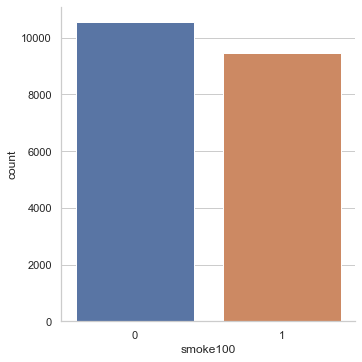

In [68]:
sns.catplot(x="smoke100", kind="count", data=cdc_df)

### Exercise 2 - Create a numerical summary for height and age, and compute the interquartile range for each. Compute the relative frequency distribution for gender and exerany. How many males are in the sample? What proportion of the sample reports being in excellent health?

Let's first make the numerical summary for height and age, as well as computing the IQR for both.

In [69]:
for column in ["age", "weight"]:
    display(cdc_df[column].describe())
    print(f"For variable {column} IQR is {cdc_df[column].describe()['75%'] - cdc_df[column].describe()['25%']}.")

count    20000.000000
mean        45.068250
std         17.192689
min         18.000000
25%         31.000000
50%         43.000000
75%         57.000000
max         99.000000
Name: age, dtype: float64

For variable age IQR is 26.0.


count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

For variable weight IQR is 50.0.


Let's now compute the relative frequency for `gender` and `exerany`.

In [70]:
gender_table = cdc_df["gender"].value_counts()
exerany_table = cdc_df["exerany"].value_counts()

gender_freq = gender_table / cdc_df.shape[0]
exerany_freq = exerany_table / cdc_df.shape[0]

print(gender_table)
print(exerany_table)

print("Relative frequencies are:")

print(gender_freq)
print(exerany_freq)

f    10431
m     9569
Name: gender, dtype: int64
1    14914
0     5086
Name: exerany, dtype: int64
Relative frequencies are:
f    0.52155
m    0.47845
Name: gender, dtype: float64
1    0.7457
0    0.2543
Name: exerany, dtype: float64


The `value_counts` method can be used to tabulate any number of variables that you provide. For example, to examine which participants have smoked across each gender, we could use the following.

In [71]:
cdc_df[["gender", "smoke100"]].value_counts()

gender  smoke100
f       0           6012
m       1           5022
        0           4547
f       1           4419
dtype: int64

Here, we see column labels of 0 and 1. Recall that 1 indicates a respondent has smoked at least 100 cigarettes. The rows refer to gender. To create a mosaic plot of this table, we would do the following.

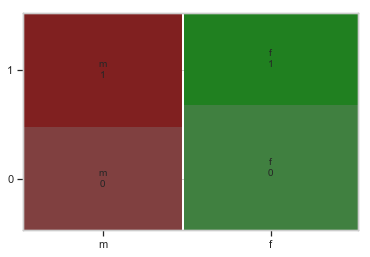

In [72]:
from statsmodels.graphics.mosaicplot import mosaic

_ = mosaic(cdc_df, ["gender", "smoke100"])

### Exercise 3 - What does the mosaic plot reveal about smoking habits and gender?

From this mosaic plot I can see that smoking is more common among males than females.

## Interlude: How Python thinks about data

We can see the size of the data frame by calling the attribute `shape`.

In [73]:
cdc_df.shape

(20000, 9)

Now, if we want to access a subset of the full data frame, we can use row-and-column notation. For example, to see the sixth variable of the $567^{th}$ respondent, we use the following code.

In [74]:
cdc_df.iloc[566, 5]

160

We know that weight is the $6^{th}$ variable because it is the sixth entry in the list of variable names. To see the weights for the first 10 respondents we can type the following.

In [75]:
cdc_df.iloc[0:10, 5]

0    175
1    125
2    105
3    132
4    150
5    114
6    194
7    170
8    150
9    180
Name: weight, dtype: int64

Finally, if we want all of the data for the first 10 respondents, we type the following.

In [76]:
cdc_df.iloc[1:10]

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


We can try the following to see the weights for all 20,000 respondents.

In [77]:
cdc_df.iloc[:, 5]

0        175
1        125
2        105
3        132
4        150
        ... 
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64

An alternative method to access the weight data is by referring to the name.

In [78]:
cdc_df["weight"]

0        175
1        125
2        105
3        132
4        150
        ... 
19995    215
19996    200
19997    216
19998    165
19999    170
Name: weight, Length: 20000, dtype: int64

We see the weight for the $567^{th}$ respondent by typing the following.

In [79]:
cdc_df.loc[566, "weight"]

160

## A little more on subsetting

It’s often useful to extract all individuals (cases) in a data set that have specific characteristics. We accomplish this through _conditioning_ commands.

In [80]:
print(cdc_df["gender"] == "m")
print("\n")
print(cdc_df["age"] > 30)

0         True
1        False
2        False
3        False
4        False
         ...  
19995    False
19996     True
19997    False
19998    False
19999     True
Name: gender, Length: 20000, dtype: bool


0         True
1         True
2         True
3         True
4         True
         ...  
19995    False
19996     True
19997     True
19998     True
19999     True
Name: age, Length: 20000, dtype: bool


These commands produce a series of `True` and `False` values. There is one value for each respondent, where `True` indicates that the person was male (via the first command) or older than 30 (second command).

Suppose we want to extract just the data for the men in the sample, or just for those over 30. We can use the following command to create a new dataframe `mdata` which contains only male (those rows with `gender` equal to `m`).

In [81]:
mdata = cdc_df[cdc_df["gender"] == "m"]

### Exercise 4 - Create a new object called under23_and_smoke that contains all observations of respondents under the age of 23 that have smoked 100 cigarettes in their lifetime. Write the command you used to create the new object as the answer to this exercise.

In [82]:
under23_and_smoke = cdc_df[(cdc_df["age"] < 23) & (cdc_df["smoke100"] == 1)]
display(under23_and_smoke)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
12,excellent,1,0,1,66,185,220,21,m
36,very good,1,0,1,70,160,140,18,f
95,excellent,1,1,1,74,175,200,22,m
179,good,1,1,1,64,190,140,20,f
181,very good,1,1,1,62,92,92,21,f
...,...,...,...,...,...,...,...,...,...
19859,good,1,1,1,72,170,200,18,m
19863,good,0,0,1,61,107,100,19,f
19889,fair,1,0,1,71,195,200,21,m
19902,very good,1,0,1,70,140,140,20,m


With our subsetting tools in hand, we’ll now return to the task of the day: making basic summaries of the BRFSS questionnaire. We’ve already looked at categorical data such as `smoke` and `gender` so now let’s turn our attention to quantitative data. Two common ways to visualize quantitative data are with box plots and histograms. We can construct a box plot for a single variable with the following command.

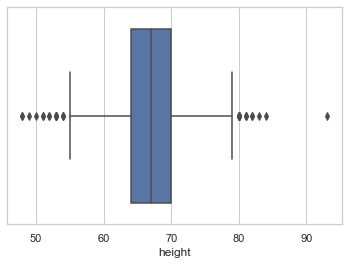

In [83]:
ax = sns.boxplot(x=cdc_df["height"])

We can compare the locations of the components of the box by examining the summary statistics.

In [84]:
cdc_df["height"].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

Confirm that the median and upper and lower quartiles reported in the numerical summary match those in the graph. The purpose of a boxplot is to provide a thumbnail sketch of a variable for the purpose of comparing across several categories.

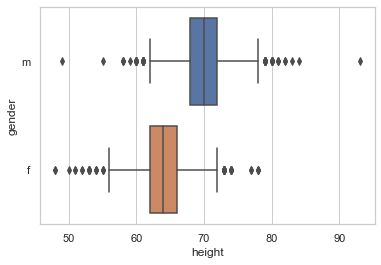

In [86]:
ax = sns.boxplot(x="height", y="gender", data=cdc_df)

Next let’s consider a new variable that doesn’t show up directly in this data set: Body Mass Index (BMI) (http://en.wikipedia.org/wiki/Body_mass_index). BMI is a weight to height ratio and can be calculated as:

$$
BMI = \frac{weight\ (lb)}{height\ (in)^2} * 703
$$

703 is the approximate conversion factor to change units from metric (meters and kilograms) to imperial (inches and pounds).

The following two lines first make a new object called bmi and then creates box plots of these values.

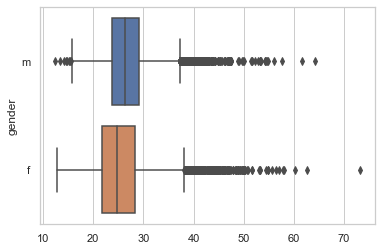

In [90]:
bmi = (cdc_df["weight"] / cdc_df["height"] ** 2) * 703
ax = sns.boxplot(x=bmi, y="gender", data=cdc_df)

### Exercise 5 - What does this box plot show? Pick another categorical variable from the data set and see how it relates to BMI. List the variable you chose, why you might think it would have a relationship to BMI, and indicate what the figure seems to suggest.

The box plot shows that males have a slightly larger body mass index than females. Let's now plot the body mass index by the variable `exerany`.

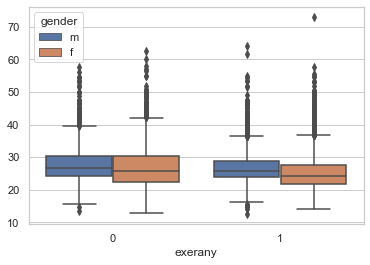

In [95]:
ax = sns.boxplot(x="exerany", y=bmi, hue="gender", data=cdc_df)

Among both genders, `bmi` is lower when `exerany` is `True`. This means those who exercise and have a healthy lifestyle tend to be in the _regular_ range for the body mass index. And this is a fact that has been overly confirmed throughout the years by science.

Finally, let’s make some histograms. We can look at the histogram for the age of our respondents with the command

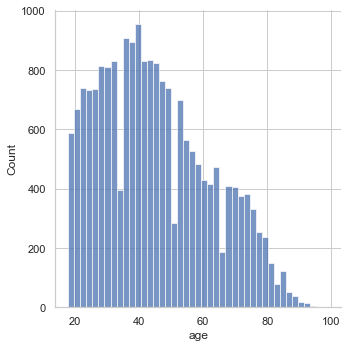

In [96]:
ax = sns.displot(cdc_df, x="age")

Histograms are generally a very good way to see the shape of a single distribution, but that shape can change depending on how the data is split between the different bins. You can control the number of bins by adding an argument to the method. In the next two lines, we first make a default histogram of `bmi` and then one with 50 bins.

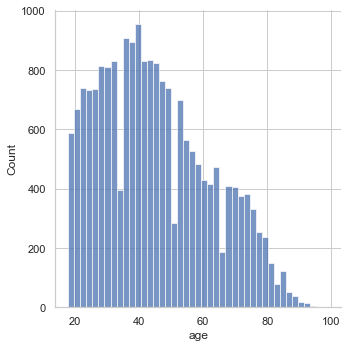

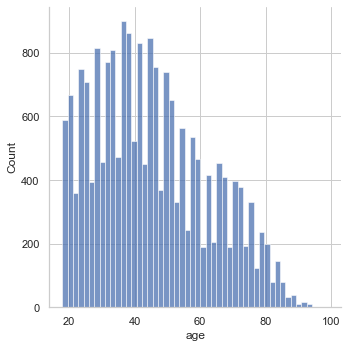

In [99]:
ax = sns.displot(cdc_df, x="age")
ax = sns.displot(cdc_df, x="age", bins=50)

At this point, we’ve done a good first pass at analyzing the information in the BRFSS questionnaire. We’ve found an interesting association between smoking and gender, and we can say something about the relationship between people’s assessment of their general health and their own BMI. We’ve also picked up essential computing tools – summary statistics, subsetting, and plots – that will serve us well throughout this course.

## On Your Own

### 1. Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

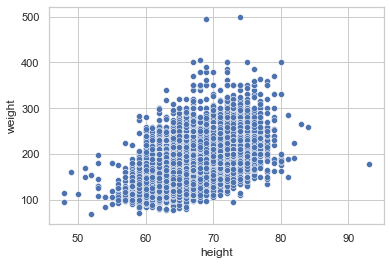

In [100]:
ax = sns.scatterplot(x="height", y="weight", data=cdc_df)

We can see that weight is positively associated with height.

### 2. Let’s consider a new variable: the difference between desired weight (`wtdesire`) and current weight (`weight`). Create this new variable by subtracting the two columns in the data frame and assigning them to a new object called `wdiff`.

In [104]:
wdiff = cdc_df["weight"] - cdc_df["wtdesire"]
wdiff

0         0
1        10
2         0
3         8
4        20
         ..
19995    75
19996    15
19997    66
19998     0
19999     5
Length: 20000, dtype: int64

### 3. What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person’s weight and desired weight. What if wdiff is positive or negative?

The new variable `wdiff` is a numerical variable. If this variable equals to zero for some observation, it means that person is already in his/her desired weight. If it's positive, it means the person is above his/her desired weight. The opposite is true if this variable is negative.

### 4. Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

Let's plot with an histogram the distribution of such variable.

count    20000.000000
mean        14.589100
std         24.045856
min       -500.000000
25%          0.000000
50%         10.000000
75%         21.000000
max        300.000000
dtype: float64


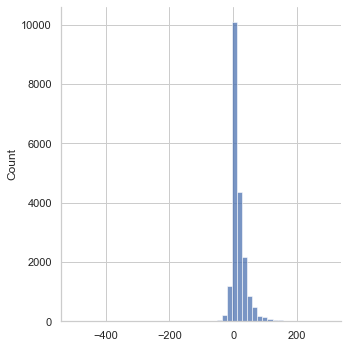

In [117]:
print(wdiff.describe())
ax = sns.displot(wdiff, bins=50)

In general, people have a realistic desire (getting 10 pounds lighter or so). Probably we have some bad input as it is unrealistic to be 500 less than the desired weight! And the same goes for the fact that someone wants to lose 300 pounds!

### 5. Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women. 

To answer this question we can plot a side by side box plot, one for each gender.

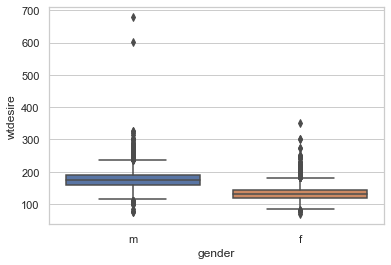

In [122]:
ax = sns.boxplot(x="gender", y="wtdesire", data=cdc_df)

Except for those outliers which most likely are due to bad inputs, the results are pretty obvious: males tend to desire higher weights than females.

### 6. Now it’s time to get creative. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.

Let's write a script to get this answer.

In [133]:
wt_mean = cdc_df["weight"].mean()
wt_std = cdc_df["weight"].std()

one_std_less = wt_mean - wt_std
one_std_more = wt_mean + wt_std

proportion = cdc_df[cdc_df["weight"].between(one_std_less, one_std_more, inclusive="both")].shape[0] / cdc_df.shape[0]

print(proportion)

0.7076


As we can see, 70.76% of the data is within one standard deviation. This seems coherent to the [following](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) empirical rule.